# Week 4: Numerical operations, data handling, data visualization


**Setup**: make sure you've completed the instructions in the README for this week!


This exercise attempts to be a pedagogical introduction to some key libraries in
scientific programming.  

Unlike the wet lab, it is very hard to break things or blow things up in a notebook. To
get the most of these coding exercises, try things out and experiment with the code!

Learning some cool things usually starts with a question 


## 0. Introduction

Numpy, pandas, and matplotlib are three of the most widely used libraries in the Python
data science ecosystem. Each serves a distinct purpose in data manipulation, analysis,
and visualization, making them indispensable tools for scientists, including those in
the chemical sciences.

* `numpy` is used for efficient array operations and matrix manipulation, and statistical
functions.
* `pandas` is used for making data tables, and reading, writing and manipulation from
  them.
* `matplotlib` is used for creating high quality plots and figures.


Each will be covered in more detail below. But first, we need to import these modules.
With `import x as y` below, we import the package `x` with an ***alias*** `y`. The
aliases shown below are community conventions for these packages (i.e. `np` for numpy,
`pd` for `pandas` and `plt` for matplotlib). 

These are important to be aware of, as oftentimes help pages online (for instance, if
you are trying to find a solution to a problem on Stack Exchange) may use these
aliases without explanation.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Note:** if you get a `ModuleNotFound` error, make sure you have gone through this
week's README first!

## 1. Numerical operations with `numpy`

**What is is**: Numpy (Numerical Python) is a library for numerical computing in Python.
It provides support for large, multi-dimensional arrays and matrices, along with a
collection of mathematical functions to operate on these arrays efficiently.

**Why it's used**: Numpy is fundamental for scientific computing due to its powerful
data structures, which enable high-performance calculations and data analysis. It serves
as the backbone for many other Python data analysis libraries, including pandas and many
machine learning frameworks.

**Usefulness in Chemical Science**: In chemistry, numpy is essential for handling
numerical data such as molecular structures, quantum mechanical properties, and large
datasets generated from simulations or experimental measurements. Its efficiency in
performing vectorized operations makes it ideal for computational chemistry tasks,
including molecular dynamics simulations and numerical analysis.

### Vectorized operations: faster than `for` loops

In previous exercises, you were introduced to for loops as a way to repeatedly execute a
block of code for a specified number of times or over a sequence. NumPy operations allow
for vectorized processing of data arrays, often replacing the need for for loops with
more efficient and concise array-based calculations. They work by ***parallelizing**
operations.

**Introduction to `%%timeit`**: The `%%timeit` magic command in Jupyter Notebooks is
used to measure the execution time of a code block. It runs the code several times in a
loop to get an accurate average time, helping you understand the performance of your
code. This is particularly useful when comparing the speed of different approaches to
solving the same problem.

Let's compare the time it takes to sum elements in a list, with for-loops versus
`numpy`.

First, create a large list as the following, which gives a list of the form `[0, 1, ...,
999998, 999999]

In [2]:
num_elements = 1000000
large_list = list(range(num_elements))

print(large_list[:5])  # list indexing as usual
print(large_list[-5:])

[0, 1, 2, 3, 4]
[999995, 999996, 999997, 999998, 999999]


Create functions to sum the elements in the list. For the `numpy` version, we use the
function `np.sum` to sum the elements in the list. When using a function from an
external module, it is a good idea to read the documentation to understand what it does.

In jupyter notebooks, you can write the name of the function followed by `?` to print
the documentation. There's a lot going here, but the important part is the signature and
the description:
```
Signature:      
np.sum(
    a,
    axis=None,
    dtype=None,
    out=None,
    keepdims=<no value>,
    initial=<no value>,
    where=<no value>,
)
...
Sum of array elements over a given axis.
```

You can also find the docs online. Google: "numpy sum" and navigate to (hopefully) the
top result, i.e. https://numpy.org/doc/stable/reference/generated/numpy.sum.html

In [3]:
np.sum?

Signature:      
np.sum(
    a,
    axis=None,
    dtype=None,
    out=None,
    keepdims=<no value>,
    initial=<no value>,
    where=<no value>,
)
Call signature:  np.sum(*args, **kwargs)
Type:            _ArrayFunctionDispatcher
String form:     <function sum at 0x0000019756803760>
File:            c:\users\milen\anaconda3\envs\ppchem\lib\site-packages\numpy\core\fromnumeric.py
Docstring:      
Sum of array elements over a given axis.

Parameters
----------
a : array_like
    Elements to sum.
axis : None or int or tuple of ints, optional
    Axis or axes along which a sum is performed.  The default,
    axis=None, will sum all of the elements of the input array.  If
    axis is negative it counts from the last to the first axis.

    .. versionadded:: 1.7.0

    If axis is a tuple of ints, a sum is performed on all of the axes
    specified in the tuple instead of a single axis or all the axes as
    before.
dtype : dtype, optional
    The type of the returned array and of the accu

In [4]:
# Python for loops
def sum_python_loop(data) -> float:
    """Sum the elements in `data` using a for loop"""
    total = 0
    for x in data:
        total += x
    return total


# Numpy sum
def sum_numpy(data) -> float:
    """Sum the elements in `data` using numpy"""
    return np.sum(data)

Now uncomment the cells below and run them. What do you notice about the timings?

In [5]:
%%timeit
sum_python_loop(large_list)

43.1 ms ± 1.22 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [6]:
%%timeit
sum_numpy(large_list)

47.8 ms ± 1.81 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Hmmm, it appears that the Python for loop is faster here! Why? Aren't vectorized
operations supposed to be quicker than for loops?

Let's try again, but instead of summing elements in a list let's store our data in a
numpy `array` instead. Here we used the `np.arange` function to generate an array of
integers in the range `0, ... (n_elements - 1)`

In [7]:
np.arange?

Docstring:
arange([start,] stop[, step,], dtype=None, *, like=None)

Return evenly spaced values within a given interval.

``arange`` can be called with a varying number of positional arguments:

* ``arange(stop)``: Values are generated within the half-open interval
  ``[0, stop)`` (in other words, the interval including `start` but
  excluding `stop`).
* ``arange(start, stop)``: Values are generated within the half-open
  interval ``[start, stop)``.
* ``arange(start, stop, step)`` Values are generated within the half-open
  interval ``[start, stop)``, with spacing between values given by
  ``step``.

For integer arguments the function is roughly equivalent to the Python
built-in :py:class:`range`, but returns an ndarray rather than a ``range``
instance.

When using a non-integer step, such as 0.1, it is often better to use
`numpy.linspace`.

See the Warning sections below for more information.

Parameters
----------
start : integer or real, optional
    Start of interval.  The interva

In [8]:
large_array = np.arange(num_elements)

print(large_array[:5])  # array indexing just like list indexing
print(large_array[-5:])

[0 1 2 3 4]
[999995 999996 999997 999998 999999]


In [9]:
%%timeit
sum_python_loop(large_array)

C:\Users\milen\AppData\Local\Temp\ipykernel_15028\2873618824.py:6: RuntimeWarning: overflow encountered in scalar add
  total += x


81.6 ms ± 6.25 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [10]:
%%timeit
sum_numpy(large_array)

308 µs ± 60.2 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


Much better!

In the first example, the `np.sum` function first converts the list in `large_list` to a
numpy `array`, which has a large associated overhead cost. This makes the timings
comparable between the for loop approach and the numpy approach. However, by first
storing our data in a `np.array` in the second example, we gain access to the efficient
array operations in `numpy`. If we store and pass around data in numpy arrays in all of
our programs, we only have to consider the overhead costs once.

In general, Python lists are versatile and useful: they can be dynamically-sized and
collect together elements with different data types.

However, if we are dealing with data whose size we know, and whose data types are
homogenous (in this case `int`), using instead a NumPy array will give us far enhanced
performance in numerical computations versus for loops. For specific applications in
chemistry that are computation-intensive, like data analysis, visualization, and machine
learning, we often want to work with arrays.

Let's explore more examples of array-based operations with numpy.


### Summing lists / arrays

Let's create two lists of the same size and sum them element-wise

In [11]:
list_a = list(range(1000000))
list_b = list(range(1, 1000001))

def add_python_loop(list1: list, list2: list) -> list:
    return [x + y for x, y in zip(list1, list2)]

In [12]:
# See what the function returns
new_list = add_python_loop(list_a, list_b)
print(new_list[:10])

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]


In [13]:
%%timeit  # now time it
add_python_loop(list_a, list_b)

103 ms ± 12 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [14]:
array_a = np.arange(1000000)  # integers from 0 to 999999
array_b = np.arange(1, 1000001)  # integers from 1 to 1000000

def add_numpy_arrays(array_1: np.ndarray, array_2: np.ndarray) -> np.ndarray:
    return array_1 + array_2  # you can just use the + operator here!

In [15]:
# See what the function returns
new_array = add_numpy_arrays(array_a, array_b)
print(new_array[:10])

# Use the `.shape` attribute to see the shapes of the arrays
print(array_a.shape, array_b.shape, new_array.shape)

[ 1  3  5  7  9 11 13 15 17 19]
(1000000,) (1000000,) (1000000,)


In [16]:
%%timeit  # now time it
add_numpy_arrays(array_a, array_b)

1.65 ms ± 147 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


### Initializing numpy arrays

In NumPy, multi-dimensional arrays (also known as ndarrays) are the foundation for most
of the library's operations, allowing you to efficiently store and manipulate data
across multiple dimensions. Creating multi-dimensional arrays in NumPy is
straightforward, enabling the handling of complex data structures like matrices for
linear algebra, tensors for machine learning, or grids for scientific computing.

You can create multi-dimensional arrays in NumPy using various methods, including
np.array, np.zeros, np.ones, and np.arange, among others. Here are some examples to get
you started:

In [21]:
# Create a 2D array (matrix)
matrix = np.array([[1, 2, 3], [4, 5, 6]])
print(matrix)

# Create a 2x3 array of zeros
zeros_array = np.zeros((2, 3))
print(zeros_array)

# Create a 3x3x3 array of ones
ones_array = np.ones((3, 3, 3))
print(ones_array)

# Create a 3x4 array with a range of numbers
range_array = np.arange(12).reshape(3, 4)
print(range_array)

range_array2 = np.arange(16).reshape(4, 4)
print(range_array2)

[[1 2 3]
 [4 5 6]]
[[0. 0. 0.]
 [0. 0. 0.]]
[[[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]]
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]


Often, you'll need to reshape an array into a different dimension. This is done using
the .reshape() method, which allows you to specify the new shape as long as the total
number of elements remains the same.

In [24]:
# Reshape a 1D array into a 2D array
one_d_array = np.arange(6)
two_d_array = one_d_array.reshape(2, 3)
array_new = range_array2.reshape(2,8)
print(one_d_array)
print(two_d_array)
print(array_new)

[0 1 2 3 4 5]
[[0 1 2]
 [3 4 5]]
[[ 0  1  2  3  4  5  6  7]
 [ 8  9 10 11 12 13 14 15]]


### Reading from file into numpy arrays

To illustrate how to read chemical data from a file using `np.loadtxt`, let's consider a
simple example where we have a file containing molecular weights of several compounds,
stored in the file "molecular_weights.txt". 

The data file is organized with the name of the compound in one column and its molecular
weight in the other. For this example, let's assume we are only interested in the
numerical data (molecular weights) and that our data file is structured with comments
marked by "#" and values separated by commas.

In [25]:
# Path to the data file
file_path = 'molecular_data.txt'

# Note that if we try to load the entire file into a single array, we'll get an error as
# the file contains both strings and floats. Here, we use delimiter=',' to handle the
# comma-separated values
np.loadtxt(file_path, delimiter=',', skiprows=1)

ValueError: could not convert string 'Water' to float64 at row 0, column 1.

In [26]:
# As numpy arrays must be homogenously typed, i.e. we can't mix strings and floats. We
# can pass the `dtype` argument to `np.loadtxt` to specify the data type of the array,
# ensuring everything is loaded as strings. However, this perhaps isn't so useful as we
# want the molecular weights as floats.
np.loadtxt(file_path, delimiter=',', skiprows=1, dtype=str)

array([['Water', '18.015', '100.0'],
       ['Carbon Dioxide', '44.01', '-78.5'],
       ['Methane', '16.04', '-161.5'],
       ['Ethanol', '46.07', '78.3'],
       ['Oxygen', '32.00', '-183.0'],
       ['Nitrogen', '28.01', '-196.0'],
       ['Hydrogen Peroxide', '34.01', '150.2'],
       ['Ammonia', '17.03', '-33.3'],
       ['Sulfuric Acid', '98.09', '337.0'],
       ['Acetic Acid', '60.05', '118.1'],
       ['Methanol', '32.04', '64.7'],
       ['Benzene', '78.11', '80.1'],
       ['Ethylene', '28.05', '-103.7'],
       ['Propane', '44.10', '-42.1'],
       ['Butane', '58.12', '-0.5'],
       ['Pentane', '72.15', '36.1'],
       ['Hexane', '86.18', '68.7'],
       ['Heptane', '100.20', '98.4'],
       ['Octane', '114.22', '125.7'],
       ['Nonane', '128.25', '150.8'],
       ['Decane', '142.28', '174.1'],
       ['Caffeine', '194.19', '178.0'],
       ['Ethane', '30.07', '-88.6']], dtype='<U17')

In [27]:
# Instead, we can load the names as strings and the molecular weights as floats using
# the `usecols` argument to specify which columns to load.
names = np.loadtxt(file_path, delimiter=',', skiprows=1, usecols=[0], dtype=str)
molecular_weights = np.loadtxt(file_path, delimiter=',', skiprows=1, usecols=[1], dtype=np.float64)

print("Names:")
print(names)
print("Molecular Weights (g/mol):")
print(molecular_weights)

Names:
['Water' 'Carbon Dioxide' 'Methane' 'Ethanol' 'Oxygen' 'Nitrogen'
 'Hydrogen Peroxide' 'Ammonia' 'Sulfuric Acid' 'Acetic Acid' 'Methanol'
 'Benzene' 'Ethylene' 'Propane' 'Butane' 'Pentane' 'Hexane' 'Heptane'
 'Octane' 'Nonane' 'Decane' 'Caffeine' 'Ethane']
Molecular Weights (g/mol):
[ 18.015  44.01   16.04   46.07   32.     28.01   34.01   17.03   98.09
  60.05   32.04   78.11   28.05   44.1    58.12   72.15   86.18  100.2
 114.22  128.25  142.28  194.19   30.07 ]


Let's do some basic statistical analysis on the molecular weight data, by finding the
range of values, and the mean and standard deviation.

For the mean and standard deviation, perform a Google search to identify the appropriate
numpy functions to use here.

In [28]:
# TODO: find the mean and standard deviation of the molecular weights

max_value = np.max(molecular_weights)
min_value = np.min(molecular_weights)
mean_value = np.mean(molecular_weights) # your code here
std_value = np.std(molecular_weights)  # your code here

print(f"Max: {max_value}, Min: {min_value}, Mean: {mean_value}, Std: {std_value}")

Max: 194.19, Min: 16.04, Mean: 65.27326086956522, Std: 45.39299739158912


In [29]:
# Which molecule has the highest molecular weight? We want to find the index in the
# `names` array where the maximum value in `molecular_weights` is located.

# We can use the `np.argmax` function to find the index of the maximum value in an
# array.
max_index = np.argmax(molecular_weights)

print(f"The molecule with the highest molecular weight is: {names[max_index]} with a weight of {molecular_weights[max_index]}")

The molecule with the highest molecular weight is: Caffeine with a weight of 194.19


## 2. Data handling with `pandas`

**What it is**: Pandas is a library providing high-level data structures and tools designed to make data analysis fast and easy in Python. Its primary data structure is the DataFrame, which allows you to store and manipulate tabular data in rows of observations and columns of variables.

**Why it's used**: Pandas is used for data cleaning, transformation, and analysis. It offers data structures with a lot of flexibility and functionality, as well as the means to efficiently handle missing data, merge datasets, and perform complex data aggregations.

**Usefulness in Chemical Sciences**: For chemists, pandas is invaluable for manipulating
and analyzing experimental datasets, such as spectroscopy data or chemical properties of
compounds. It simplifies tasks such as filtering data, performing statistical analyses,
and working with time-series data from instrumental measurements.


### Basics

Pandas has two main data structures: Series and DataFrame. A Series is essentially a
column, while a DataFrame is a multi-dimensional table made up of a collection of
Series.

A Series in pandas is one of the core data structures in the Python pandas library. It
represents a one-dimensional array-like object containing a sequence of values and an
associated array of data labels, called its index. The Series can hold any data
type—integers, strings, floating point numbers, Python objects, and so on. It’s similar
to a column in a spreadsheet or a table in a database.

In [30]:
compounds = pd.Series(["Water", "Ethanol", "Glucose", "Sodium Chloride", "Methane"])
compounds

0              Water
1            Ethanol
2            Glucose
3    Sodium Chloride
4            Methane
dtype: object

A DataFrame is a two-dimensional, size-mutable, potentially heterogeneous tabular data
structure with labeled axes (rows and columns). For a chemistry application, let’s
consider a simple example where we have a dataset of several compounds with their
molecular weights and melting points.

In [31]:
data = {
    "Compound": ["Water", "Ethanol", "Glucose", "Sodium Chloride", "Methane"],
    "Molecular Weight": [18.015, 46.07, 180.16, 58.44, 16.04],
    "Melting Point (°C)": [0, -114.1, 146, 801, -182.5]
}
df = pd.DataFrame(data)
df

,Compound,Molecular Weight,Melting Point (°C)
0,Water,18.015,0.0
1,Ethanol,46.070,-114.1
2,Glucose,180.160,146.0
3,Sodium Chloride,58.440,801.0
4,Methane,16.040,-182.5


A `DataFrame` can also be created by reading in data from file

In [32]:
# Read from the molecular_weights.txt file from before
df = pd.read_csv(file_path, )
df

,# Compound Name,Molecular Weight (g/mol),Boiling Point (°C)
0,Water,18.015,100.0
1,Carbon Dioxide,44.010,-78.5
2,Methane,16.040,-161.5
3,Ethanol,46.070,78.3
4,Oxygen,32.000,-183.0
5,Nitrogen,28.010,-196.0
6,Hydrogen Peroxide,34.010,150.2
7,Ammonia,17.030,-33.3
8,Sulfuric Acid,98.090,337.0
9,Acetic Acid,60.050,118.1


In [33]:
df.columns

Index(['# Compound Name', 'Molecular Weight (g/mol)', 'Boiling Point (°C)'], dtype='object')

In [34]:
# If we want to access a single column, we can use the column name as an attribute
df["Molecular Weight (g/mol)"]

0      18.015
1      44.010
2      16.040
3      46.070
4      32.000
5      28.010
6      34.010
7      17.030
8      98.090
9      60.050
10     32.040
11     78.110
12     28.050
13     44.100
14     58.120
15     72.150
16     86.180
17    100.200
18    114.220
19    128.250
20    142.280
21    194.190
22     30.070
Name: Molecular Weight (g/mol), dtype: float64

However, inclusion of the units in the column name may make it pretty inconvenient to
reference over and over again.

We can instead load the data with custom column names:

In [35]:
# Load the data again, but this time specify the column names
df = pd.read_csv(file_path, names=["molecule", "weight", "boiling_point_celsius"], skiprows=1)
df

,molecule,weight,boiling_point_celsius
0,Water,18.015,100.0
1,Carbon Dioxide,44.010,-78.5
2,Methane,16.040,-161.5
3,Ethanol,46.070,78.3
4,Oxygen,32.000,-183.0
5,Nitrogen,28.010,-196.0
6,Hydrogen Peroxide,34.010,150.2
7,Ammonia,17.030,-33.3
8,Sulfuric Acid,98.090,337.0
9,Acetic Acid,60.050,118.1


In [36]:
df["weight"]

0      18.015
1      44.010
2      16.040
3      46.070
4      32.000
5      28.010
6      34.010
7      17.030
8      98.090
9      60.050
10     32.040
11     78.110
12     28.050
13     44.100
14     58.120
15     72.150
16     86.180
17    100.200
18    114.220
19    128.250
20    142.280
21    194.190
22     30.070
Name: weight, dtype: float64

### Data inspection

Pandas provides numerous functions to quickly inspect your data:

* `df.head()` displays the first few rows of the DataFrame.
* `df.describe()` gives a statistical summary of the numerical columns.
* `df.dtypes` shows the data type of each column.

In [37]:
df.describe()

,weight,boiling_point_celsius
count,23.000000,23.000000
mean,65.273261,37.956522
std,46.413192,132.381971
min,16.040000,-196.000000
25%,31.035000,-60.300000
50%,46.070000,68.700000
75%,92.135000,121.900000
max,194.190000,337.000000


### Indexing

In pandas, .loc and .iloc are indexing operators used for selecting data from a
DataFrame. While both are used for data selection, they differ in how they perform the
selection:

* `.loc` is label-based, meaning you use the labels of the rows and columns to select data.
* `.iloc` is integer position-based, so you use integer indices to select data.

In [38]:
# Select the row for Carbon Dioxide (index 1)
df.loc[1]

molecule                 Carbon Dioxide
weight                            44.01
boiling_point_celsius             -78.5
Name: 1, dtype: object

In [39]:
# Select rows for Water and Methanol
df.loc[[0, 10]]

,molecule,weight,boiling_point_celsius
0,Water,18.015,100.0
10,Methanol,32.040,64.7


In [40]:
# Select rows for Water and Methane
df.iloc[[0, 2]]

,molecule,weight,boiling_point_celsius
0,Water,18.015,100.0
2,Methane,16.040,-161.5


In [41]:
# Select the Molecular Weight and Melting Point for Carbon Dioxide and Methane
df.iloc[[1, 2], [1, 2]]

,weight,boiling_point_celsius
1,44.01,-78.5
2,16.04,-161.5


In [42]:
# Select the row for water
df[df["molecule"] == "Water"]

,molecule,weight,boiling_point_celsius
0,Water,18.015,100.0


In [43]:
# Select all the hydrocarbons
hydrocarbons = [
    "Methane",
    "Ethane",
    "Propane",
    "Butane",
    "Pentane",
    "Hexane",
    "Heptane",
    "Octane",
    "Nonane",
    "Decane",
]

df[df["molecule"].isin(hydrocarbons)]

,molecule,weight,boiling_point_celsius
2,Methane,16.04,-161.5
13,Propane,44.10,-42.1
14,Butane,58.12,-0.5
15,Pentane,72.15,36.1
16,Hexane,86.18,68.7
17,Heptane,100.20,98.4
18,Octane,114.22,125.7
19,Nonane,128.25,150.8
20,Decane,142.28,174.1
22,Ethane,30.07,-88.6


### Operations

In [44]:
molecular_weights = df["weight"]

print("Max molecular weight:", molecular_weights.max())
print("Min molecular weight:", molecular_weights.min())

print("Mean molecular weight (pandas):", molecular_weights.mean())
print("Mean molecular weight (numpy):", np.mean(molecular_weights))

print("Standard deviation of molecular weight (pandas):", molecular_weights.std())
print("Standard deviation of molecular weight (numpy):", np.std(molecular_weights))

Max molecular weight: 194.19
Min molecular weight: 16.04
Mean molecular weight (pandas): 65.27326086956522
Mean molecular weight (numpy): 65.27326086956522
Standard deviation of molecular weight (pandas): 46.413192129567285
Standard deviation of molecular weight (numpy): 45.39299739158912


***Bonus:*** why are the standard deviations different between numpy and pandas? Have a
read of the respective documentation to see how the expressions are normalized:

* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.std.html
* https://numpy.org/doc/stable/reference/generated/numpy.std.html

In [45]:
# Adding a column of transformed data
df["boiling_point_kelvin"] = df["boiling_point_celsius"].apply(lambda x: x + 274.15)
df

,molecule,weight,boiling_point_celsius,boiling_point_kelvin
0,Water,18.015,100.0,374.15
1,Carbon Dioxide,44.010,-78.5,195.65
2,Methane,16.040,-161.5,112.65
3,Ethanol,46.070,78.3,352.45
4,Oxygen,32.000,-183.0,91.15
5,Nitrogen,28.010,-196.0,78.15
6,Hydrogen Peroxide,34.010,150.2,424.35
7,Ammonia,17.030,-33.3,240.85
8,Sulfuric Acid,98.090,337.0,611.15
9,Acetic Acid,60.050,118.1,392.25


In [46]:
# Sort by boiling point, low to high
df.sort_values(by="boiling_point_celsius")

,molecule,weight,boiling_point_celsius,boiling_point_kelvin
5,Nitrogen,28.010,-196.0,78.15
4,Oxygen,32.000,-183.0,91.15
2,Methane,16.040,-161.5,112.65
12,Ethylene,28.050,-103.7,170.45
22,Ethane,30.070,-88.6,185.55
1,Carbon Dioxide,44.010,-78.5,195.65
13,Propane,44.100,-42.1,232.05
7,Ammonia,17.030,-33.3,240.85
14,Butane,58.120,-0.5,273.65
15,Pentane,72.150,36.1,310.25


In [47]:
# Sort by boiling point, high to low
df.sort_values(by="boiling_point_celsius", ascending=False)

,molecule,weight,boiling_point_celsius,boiling_point_kelvin
8,Sulfuric Acid,98.090,337.0,611.15
21,Caffeine,194.190,178.0,452.15
20,Decane,142.280,174.1,448.25
19,Nonane,128.250,150.8,424.95
6,Hydrogen Peroxide,34.010,150.2,424.35
18,Octane,114.220,125.7,399.85
9,Acetic Acid,60.050,118.1,392.25
0,Water,18.015,100.0,374.15
17,Heptane,100.200,98.4,372.55
11,Benzene,78.110,80.1,354.25


## 3. Data Visualization with `matplotlib`

**What it is**: Matplotlib is a plotting library for Python, providing an object-oriented API for embedding plots into applications. It's capable of producing a wide range of static, animated, and interactive visualizations in a variety of output formats.

**Why it's used**: Matplotlib is the go-to library for creating graphs, charts, and figures in Python. It's highly customizable and can produce almost any kind of visualization you might need, from simple bar charts and line plots to complex scatter plots and histograms.

**Usefulness in Chemical Sciences**: Visual representation of data is crucial in
chemistry for understanding complex relationships, trends, and patterns. Matplotlib
enables chemists to visualize experimental results, such as reaction rates or
concentration changes over time, and to compare theoretical models with experimental
data. It's also used in teaching to help explain complex concepts through visual aids.


Let's plot some chemically-inspired data.

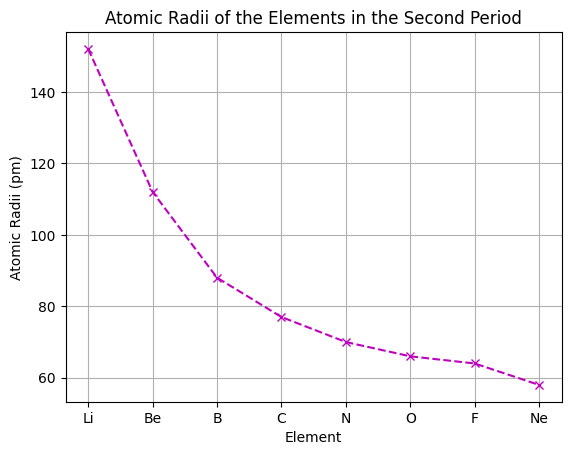

In [54]:
elements = ['Li', 'Be', 'B', 'C', 'N', 'O', 'F', 'Ne']
atomic_radii = [152, 112, 88, 77, 70, 66, 64, 58]  # in pm

# Create a plot. Use a 'o' marker to plot scatter points
fig, ax = plt.subplots()
ax.plot(elements, atomic_radii, marker='x', linestyle='--', color='m')
ax.set_title('Atomic Radii of the Elements in the Second Period')
ax.set_xlabel('Element')
ax.set_ylabel('Atomic Radii (pm)')
ax.grid(True)

Text(0, 0.5, 'Ionization Energy (eV)')

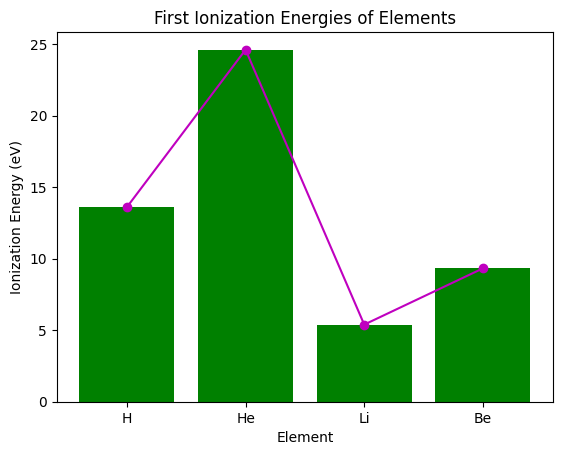

In [61]:
elements = ['H', 'He', 'Li', 'Be']
ionization_energies = [13.6, 24.6, 5.39, 9.32]  # in eV

fig, ax = plt.subplots()
ax.bar(elements, ionization_energies, color='green')
ax.plot(elements, ionization_energies, marker = 'o', linestyle = '-', color = 'm')
ax.set_title('First Ionization Energies of Elements')
ax.set_xlabel('Element')
ax.set_ylabel('Ionization Energy (eV)')

C:\Users\milen\AppData\Local\Temp\ipykernel_15028\3212535295.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hcarbons_df["num_carbons"] = [hydrocarbons[name] for name in hcarbons_df["molecule"]]


,molecule,weight,boiling_point_celsius,num_carbons
2,Methane,16.04,-161.5,1
13,Propane,44.10,-42.1,3
14,Butane,58.12,-0.5,4
15,Pentane,72.15,36.1,5
16,Hexane,86.18,68.7,6
17,Heptane,100.20,98.4,7
18,Octane,114.22,125.7,8
19,Nonane,128.25,150.8,9
20,Decane,142.28,174.1,10
22,Ethane,30.07,-88.6,2


Text(0, 0.5, 'Molecular Weight (g/mol)')

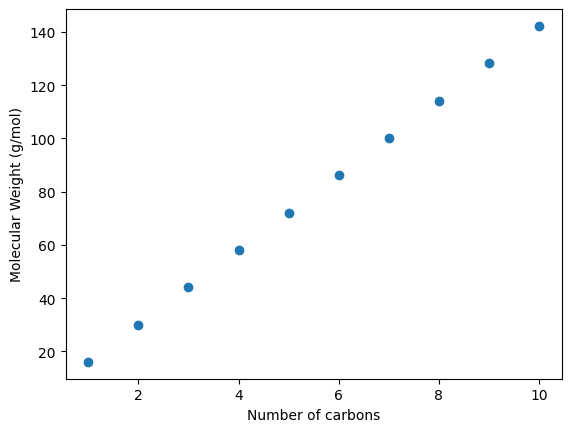

In [62]:
# Load the data from before
file_path = "molecular_data.txt"
df = pd.read_csv(file_path, names=["molecule", "weight", "boiling_point_celsius"], skiprows=1)
df

# Create a sub-dataframe for the linear hydrocarbons. First, let's create a dictionary
# to map the names to the number of carbons.
hydrocarbons = {
    "Methane": 1,
    "Ethane": 2,
    "Propane": 3,
    "Butane": 4,
    "Pentane": 5,
    "Hexane": 6,
    "Heptane": 7,
    "Octane": 8,
    "Nonane": 9,
    "Decane": 10,

}
hcarbons_df = df[df["molecule"].isin(hydrocarbons.keys())]

# Add this as a column in the dataframe
hcarbons_df["num_carbons"] = [hydrocarbons[name] for name in hcarbons_df["molecule"]]
display(hcarbons_df)

# Plot the molecular weight against the number of carbons
fig, ax = plt.subplots()
ax.scatter(hcarbons_df["num_carbons"], hcarbons_df["weight"])

# Add axes titles and labels
ax.set_xlabel("Number of carbons")
ax.set_ylabel("Molecular Weight (g/mol)")

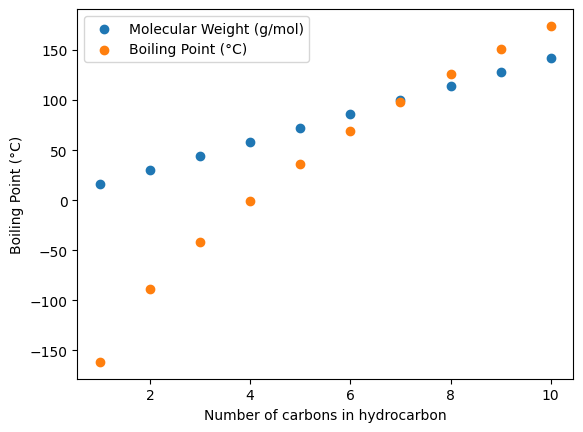

In [63]:
# Plot both the molecular weight and boiling point on the same plot, using a secondary
# axis
fig, ax = plt.subplots()
ax.scatter(hcarbons_df["num_carbons"], hcarbons_df["weight"], label="Molecular Weight (g/mol)")
ax.scatter(hcarbons_df["num_carbons"], hcarbons_df["boiling_point_celsius"], label="Boiling Point (°C)")

# Add a title and labels
ax.set_xlabel("Number of carbons in hydrocarbon")
ax.set_ylabel("Molecular Weight (g/mol)")
ax.set_ylabel("Boiling Point (°C)")
ax.legend()

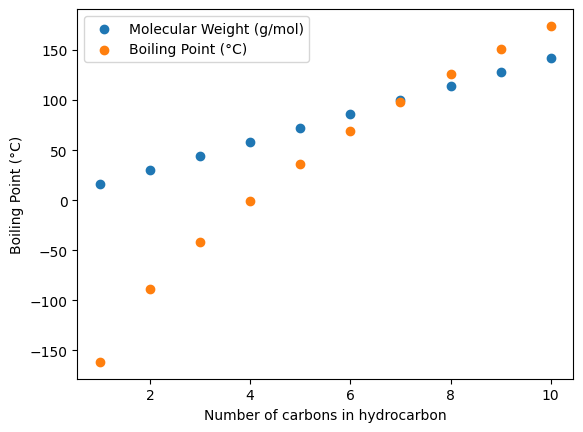

In [64]:
# Plot both the molecular weight and boiling point on the same plot, using a secondary
# axis
plt.scatter(hcarbons_df["num_carbons"], hcarbons_df["weight"], label="Molecular Weight (g/mol)")
plt.scatter(hcarbons_df["num_carbons"], hcarbons_df["boiling_point_celsius"], label="Boiling Point (°C)")

# Add a title and labels
plt.xlabel("Number of carbons in hydrocarbon")
plt.ylabel("Molecular Weight (g/mol)")
plt.ylabel("Boiling Point (°C)")
plt.legend()

Now it's your turn! 

1. Use a `Path` object to define the path to the reaction yield file from last week:
   "reaction_yields.txt". This will be stored at relative path `../week_03/reaction_yields.txt`
2. Create a `pandas` DataFrame by loading the data from this path
2. Calculate the percentage yield, and add it as a new column in the DataFrame
3. Plot a bar graph with `matplotlib`, where the x axis is the name of the scientist and
   the y axis is the percentage yield.

**Hint**: you'll need to inpsect the file to see what the ***delimiter*** is. Use the
`pd.read_csv(...)` function with the `sep` (for the delimiter) and `skiprows` arguments.

In [99]:
# TODO: your code here
import pandas as pd
path = r'C:\Users\milen\git\practical_programming_in_chemistry\practical-programming-in-chemistry-exercises\week_03\reaction_yields.txt'
df = pd.read_csv(path, )
df["Actual Yield (g)"] = actual_yield
#df["Theoretical Yield (g)"] = th_yield
#df["Yield Percentage (%)"] = actual_yield / th_yield * 100
df

NameError: name 'actual_yield' is not defined

## How about some real data?

Do you have some data from a recent lab experiment, in `.csv`, `.xlsx`, or `.txt` file
format?

If so and if you have time, try to read it into a pandas DataFrame and make some plots.
The TAs would love to hear about your experiments - speak to us and we'll see what cool
plots we can make with what you've learned already :)

## Optional: `scipy` and `seaborn`

Two packages that have not been introduced here, but provide extra functionality on top
of `numpy` and `matplotlib`, respectively, are `scipy` and `seaborn`. So that you're
aware of them, here are short descriptions and code examples.

#### SciPy: Enhancing NumPy for Scientific Computing

While NumPy provides the foundational array data structure and basic operations for
numerical computing in Python, SciPy builds upon this foundation to offer a
comprehensive collection of algorithms for scientific computing. SciPy, short for
Scientific Python, is a library that provides modules for optimization, linear algebra,
integration, interpolation, special functions, FFT, signal and image processing, ODE
solvers, and other tasks common in science and engineering. 

Essentially, SciPy takes the capabilities of NumPy to the next level by adding a vast
array of mathematical functions and algorithms for data manipulation and analysis. It's
particularly valuable for tasks that require complex mathematical computations, such as
solving differential equations, finding numerical integrals, or optimizing functions.

This example demonstrates how SciPy can be used to solve a linear system of equations,
which is a common task in scientific computing. The system of equations we'll solve is:

3x + 2y = 5

4x - y = 2

In [ ]:
# Plot the lines defined by the equations
import matplotlib.pyplot as plt

# Define the x values
x = np.linspace(-10, 10, 100)
y1 = 0.5 * (5 - 3 * x)
y2 = 4 * x - 2

fig, ax = plt.subplots()
ax.plot(x, y1)
ax.plot(x, y2)
ax.set_xlabel("x")
ax.set_ylabel("y")

In [ ]:
# Un-comment and run to install scipy
# !pip install scipy

In [ ]:
import numpy as np
from scipy import linalg

# Coefficients of the equations
A = np.array([[3, 2], [4, -1]])

# Right-hand side values
b = np.array([5, 2])

# Solving for x and y
x_intersect, y_intersect = linalg.solve(A, b)

print(f'Solution: x = {x_intersect}, y = {y_intersect}')

In [ ]:
# Re-plot the figure from above
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 100)
y1 = 0.5 * (5 - 3 * x)
y2 = 4 * x - 2

fig, ax = plt.subplots()
ax.plot(x, y1)
ax.plot(x, y2)
ax.set_xlabel("x")
ax.set_ylabel("y")

# Add the solution to the plot
ax.axvline(x_intersect, linestyle="dashed", color="gray", label=f"x = {x_intersect:.2f}")
ax.axhline(y_intersect, linestyle="dotted", color="gray", label=f"y = {y_intersect:.2f}")
ax.legend()

### Seaborn: Statistical Data Visualization

Matplotlib is an incredibly flexible plotting library, allowing for the creation of a
wide range of static, animated, and interactive plots. Seaborn builds on Matplotlib by
providing a high-level interface for drawing attractive and informative statistical
graphics. It is specifically designed to work well with pandas DataFrames, making it
easier to visualize data from these structures. 

Seaborn simplifies the process of creating complex visualizations like heat maps, time
series, and violin plots. It automatically applies default themes that are aesthetically
pleasing and offers a rich set of options for customizing plots. Additionally, Seaborn
includes functions for fitting and visualizing linear regression models, making it an
invaluable tool for data analysis and exploration. By abstracting the complexity of
Matplotlib, Seaborn enables researchers and data scientists to generate insights into
their data through visualizations with less code.

This example shows how Seaborn can be used to create a distribution plot, which is
useful for visualizing the distribution of a dataset. We'll generate a random dataset
using NumPy and then visualize it with Seaborn's distplot, which combines a histogram
with a kernel density estimate (KDE).

In [ ]:
# Un-comment and run to install seaborn
# !pip install seaborn

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Generate a random dataset
data = np.random.normal(loc=0, scale=1, size=1000)

# Create a distribution plot
sns.set(style="whitegrid")  # Set the style for the plot
sns.distplot(data, bins=30, kde=True, color="blue")

plt.title('Distribution Plot of Random Data')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()